# Clustering for Customer Segmentation

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

The most common ways in which businesses segment their customer base are:
1. Demographic information, such as gender, age, familial and marital status, income, education, and occupation.
2. Geographical information, which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
3. Psychographics, such as social class, lifestyle, and personality traits.
4. Behavioral data, such as spending and consumption habits, product/service usage, and desired benefits.

Advantages of Customer Segmentation
1. Determine appropriate product pricing.
2. Develop customized marketing campaigns.
3. Design an optimal distribution strategy.
4. Choose specific product features for deployment.
5. Prioritize new product development efforts.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

We are using the data from the Mall Customer Segmentation Data competition held on Kaggle.

In [4]:
df = pd.read_csv('data/Mall_Customers.csv')

In [5]:
df.head(5).style.hide(axis="index")

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Now we will have a short look on how the data looks like:

First we will have a glimpse on how the age of the customers is distributed

In [7]:
df.describe().T.style \
    .format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


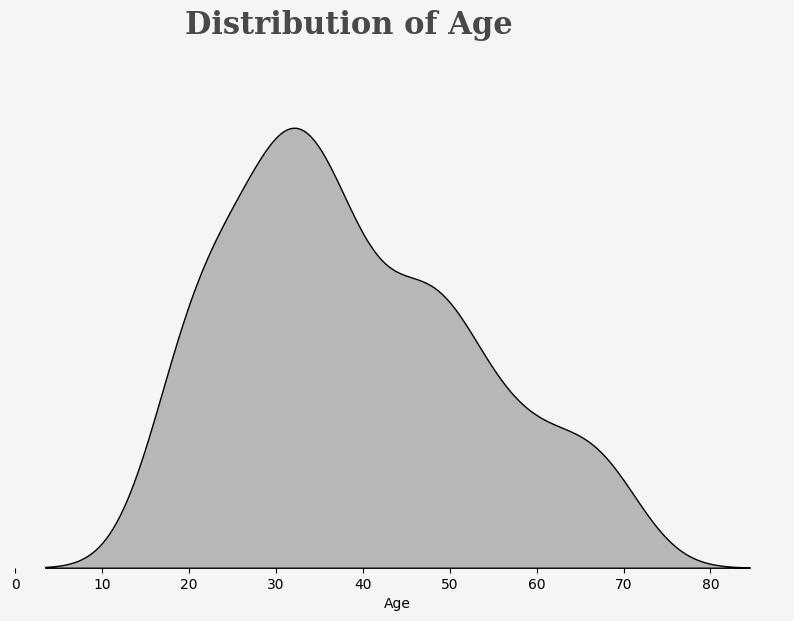

In [8]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(df["Age"],color="black",fill=True)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Age", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)

fig.show()

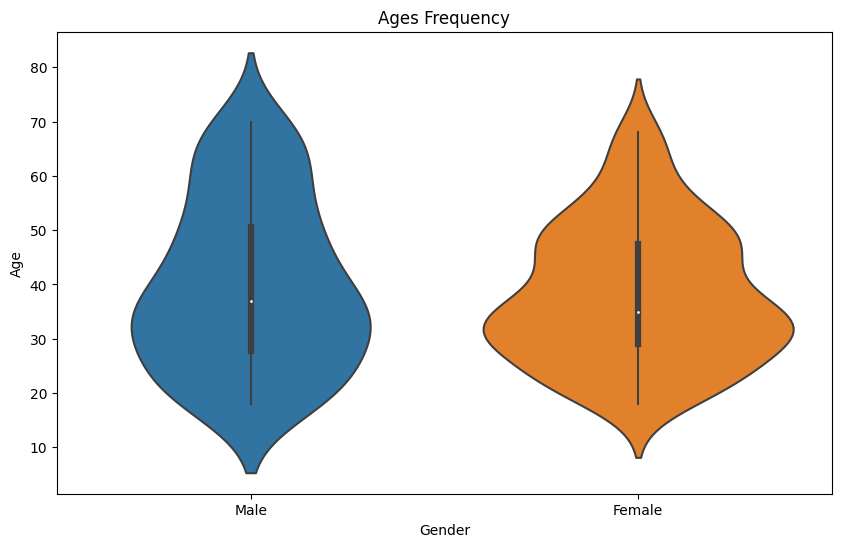

In [9]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(data=df,x="Gender", y="Age")
plt.show()

Most of the customers are in their 30s. But how are the genders distributed?

In [10]:
x = df['Gender'].value_counts()
x_male_percentage = int(x['Male']/len(df) * 100)
x_female_percentage = int(x['Female']/len(df) * 100)
print(f'Male: {x_male_percentage}%\nFemale: {x_female_percentage}%' )

Male: 44%
Female: 56%


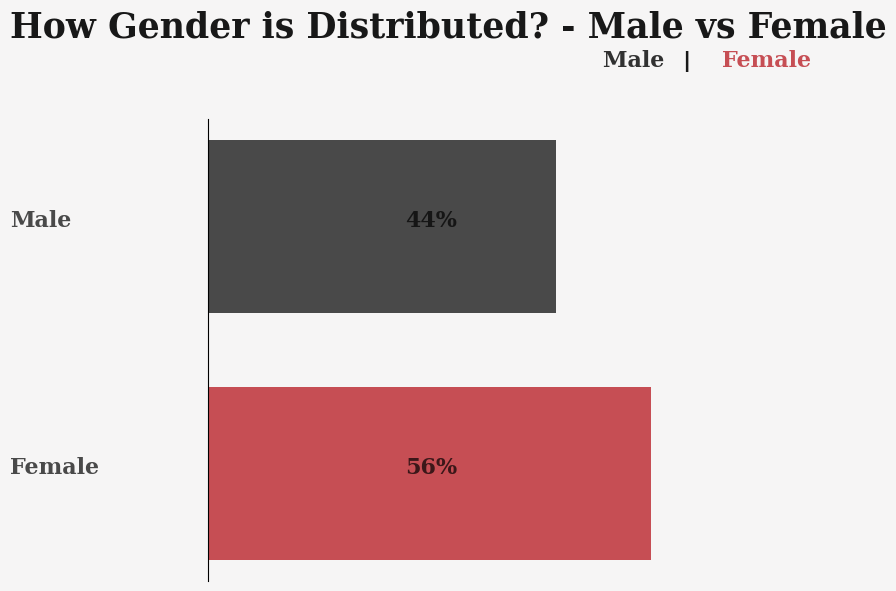

In [11]:

fig,ax=plt.subplots(figsize=(6,6))
ax.barh([1],x.values[1],height=0.7,color='black',alpha=0.7)
plt.text(-50,1, 'Male', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50,1, f'{x_male_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)



ax.barh([0],x.values[0],height=0.7,color='#b20710',alpha=0.7)
plt.text(-50,0, 'Female', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50,0, f'{x_female_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How Gender is Distributed? - Male vs Female' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(100,1.65, 'Male ', {'font': 'Serif','weight':'bold','size': '16', 'color':'black'}, alpha = 0.8)
plt.text(120,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'}, alpha = 0.9)
plt.text(130,1.65, 'Female', {'font': 'Serif','weight':'bold', 'size': '16','color':'#b20710'}, alpha = 0.7)


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There are slightly more female customers than male.

Now we will look at the Annual Income and the Spending Score of the customers.

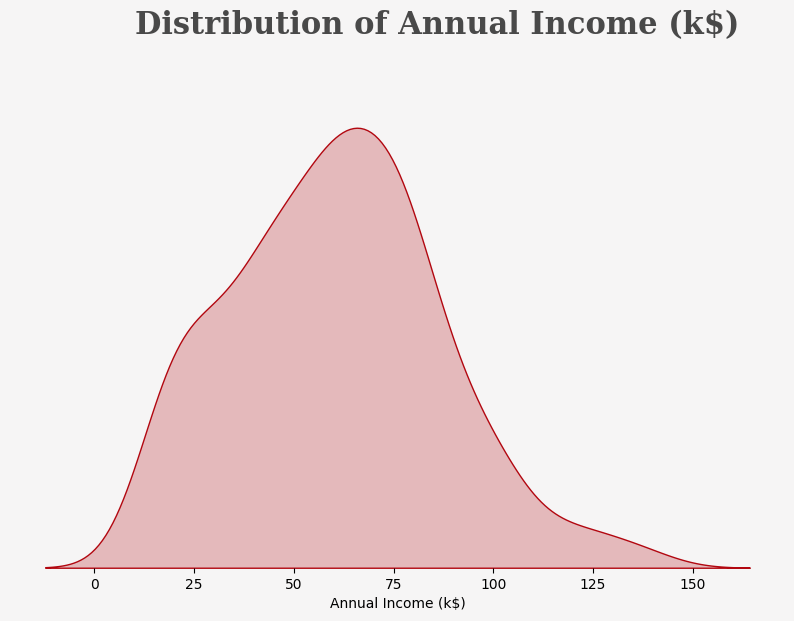

In [12]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(df["Annual Income (k$)"],color="#b20710",fill=True)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.25,1,"Distribution of Annual Income (k$)", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

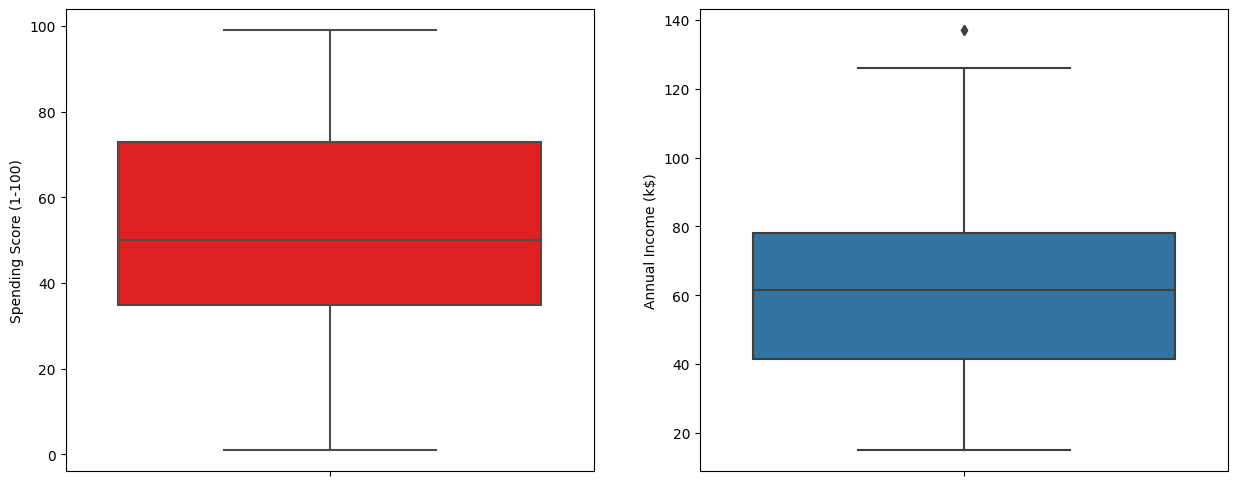

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

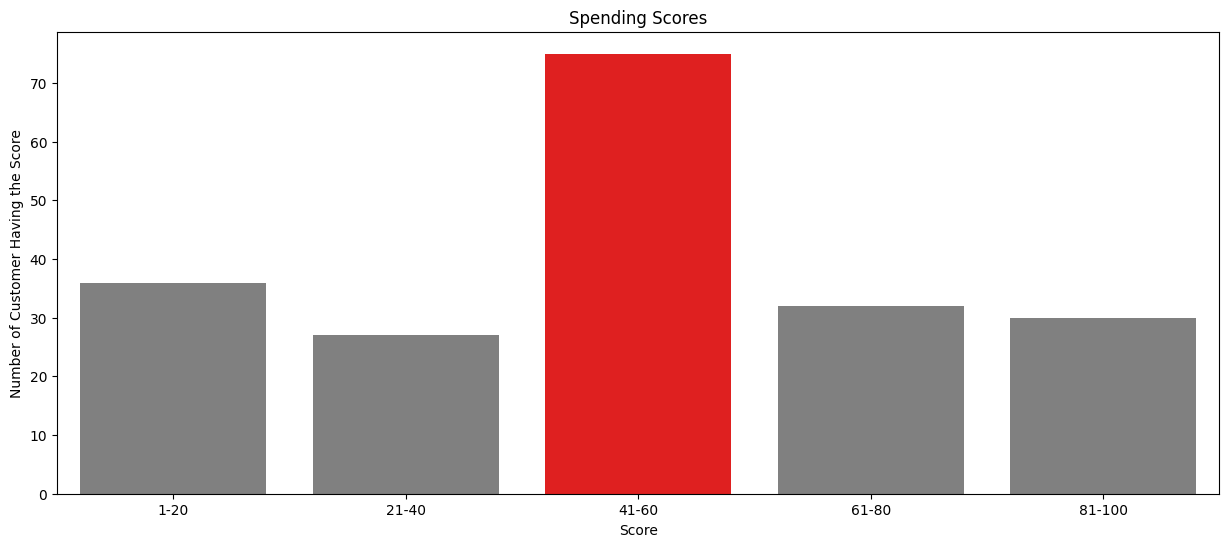

In [14]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette=['grey', 'grey','red','grey','grey'])
ax.set_facecolor('#f5f6f6')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

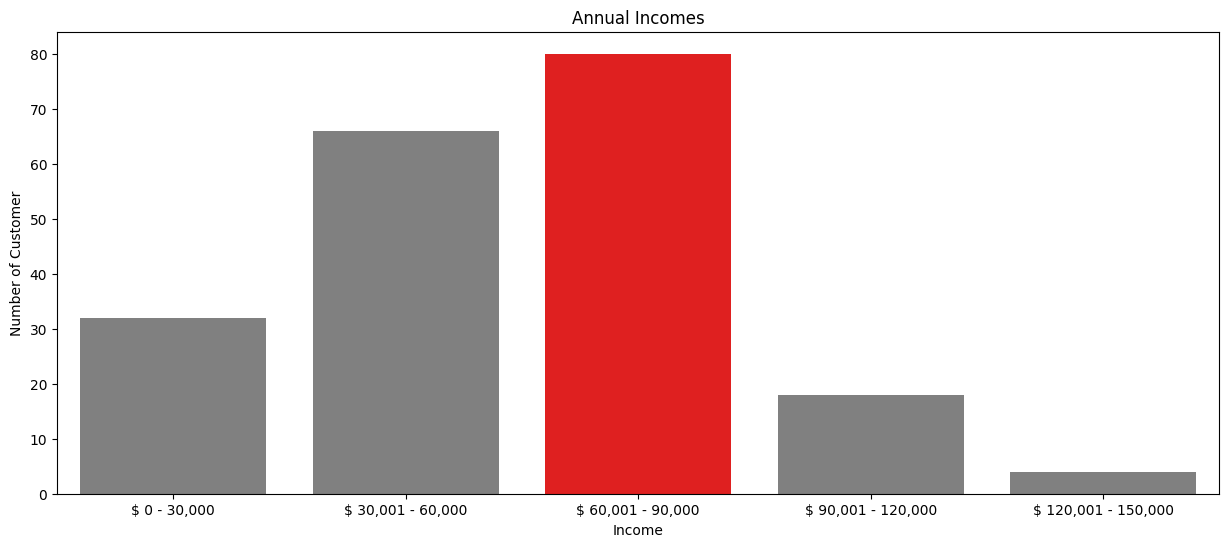

In [15]:

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette=['grey', 'grey','red','grey','grey'])
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

We can see that the most customers earn between $ 60.000 \$ $ and $ 90.000 \$ $ a year and have a spending score between 41 and 60. Let's now plot the annual income against the spending score:

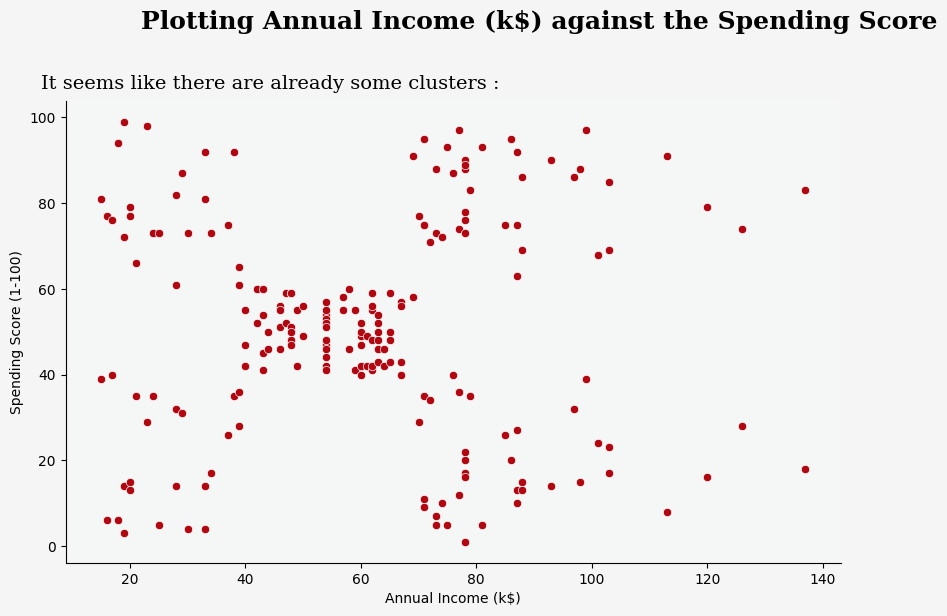

In [16]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],color="#b20710")

fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f5f6f6')
for loc in ['right', 'top']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.2,1,"Plotting Annual Income (k$) against the Spending Score",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"It seems like there are already some clusters :",**{'font':'serif', 'size':14,}, alpha = 1)


fig.show()

It seems like that there are some groups of customers. Let's have a look at that with a clustering algorithm.

## Clustering the Customer Data

We will cluster the data by Annual Income (k$) and Spending Score. So first we will create an array that only contains this two elements.

In [17]:
x = df.iloc[:, [2, 3]].values

Now we will use the Elbow Method to get the best number of clusters. We saw in the plot above that the data already shows 5 clusters so we will use the Elbow Method in this case to validate the number of clusters we expect.

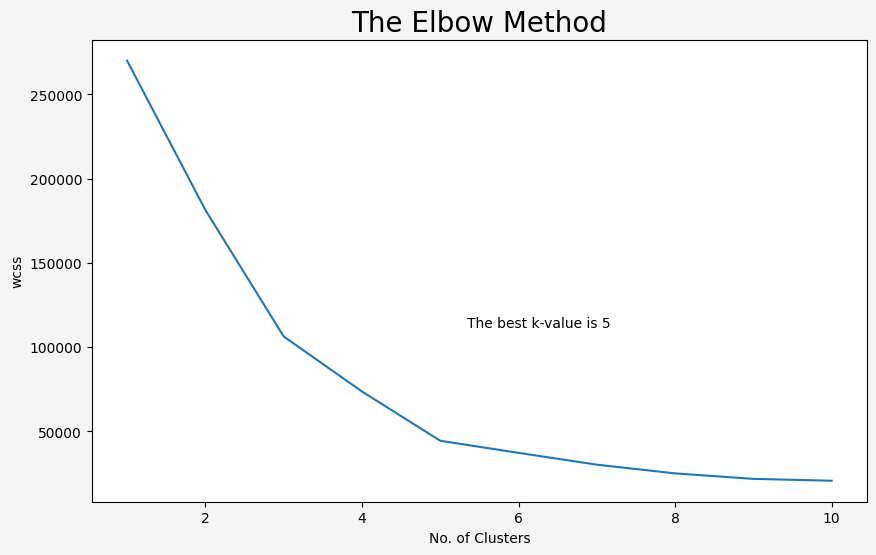

In [18]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
fig=plt.figure(figsize=(10,6))  
fig.patch.set_facecolor('#f6f5f5')

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
fig.text(0.5,0.4,"The best k-value is 5")
plt.show()

The best number of clusters we derive from the elbow method seems to be 5, which coincides with the number of clusters we can see when we plot the Annual Income (k$) against the Spending Score. So we will choose n_clusters = 5 for our kMeans model. So lets train the model and predict the clusters.

Another method to estimate a good value for k is to have a look at the corresponding silhouette plots (also called knive plots). Let's create silhouette plots fro different numbers of k from 2 to 10. 

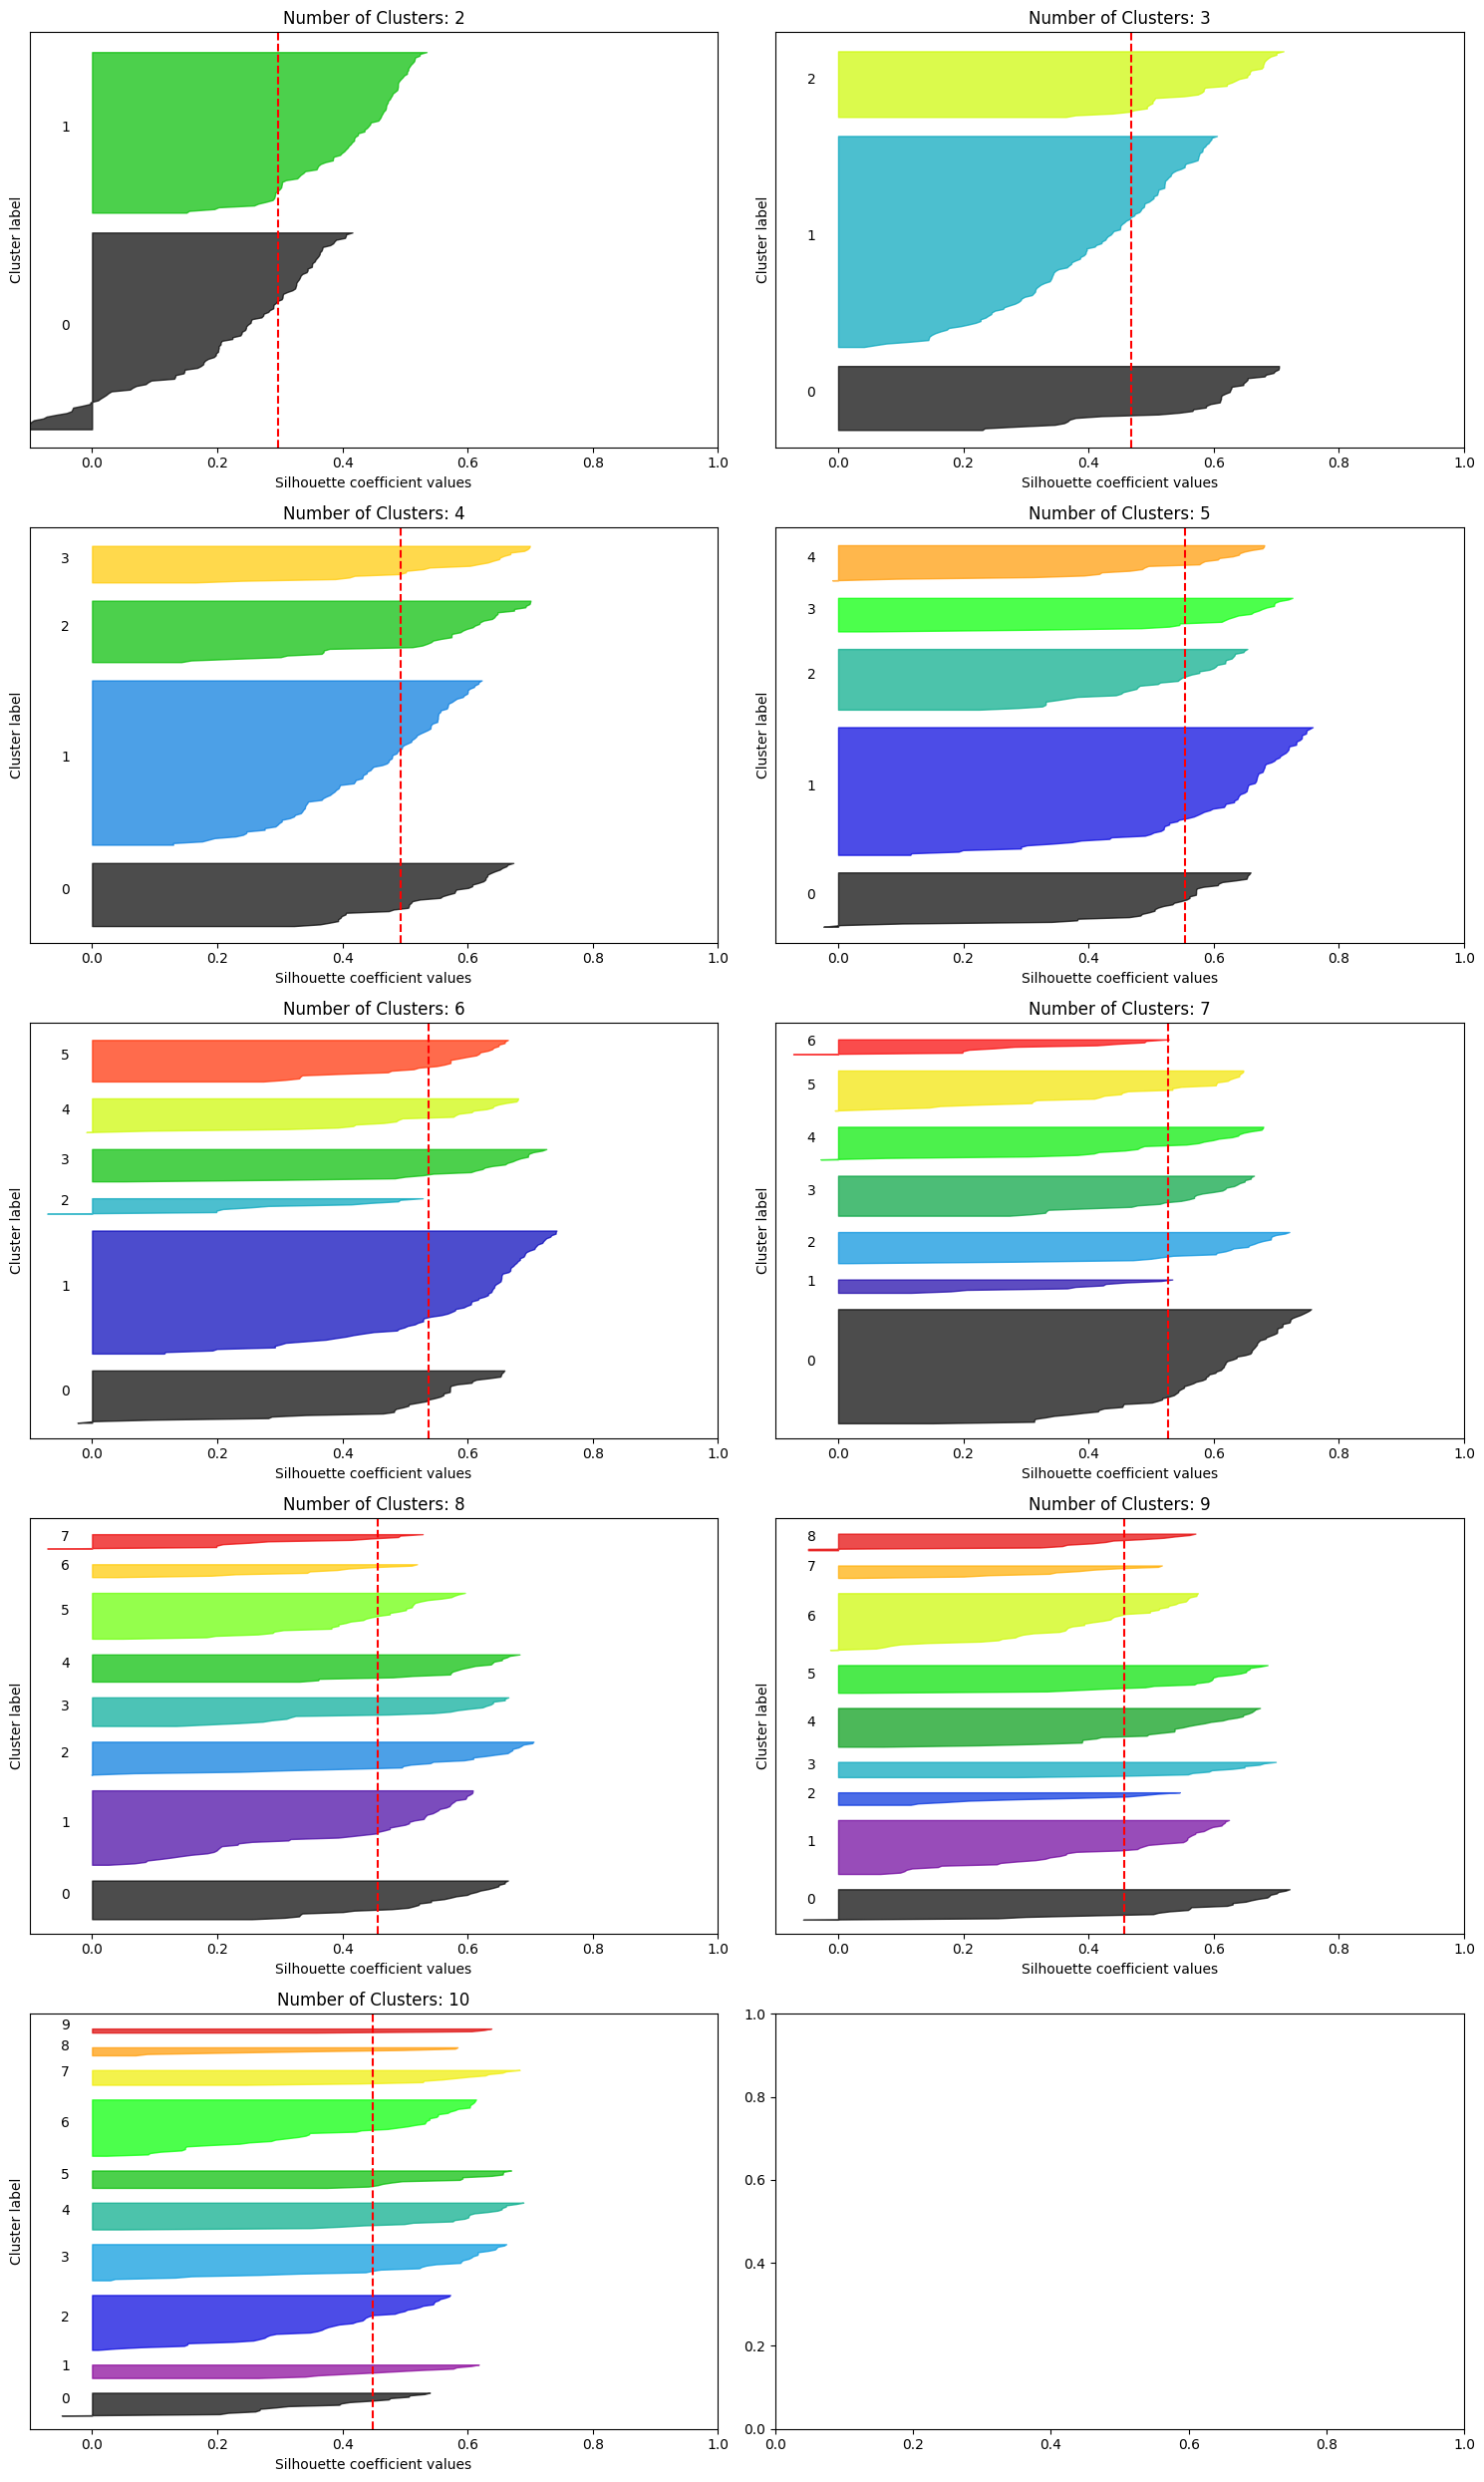

In [24]:
# Range of k values
range_n_clusters = range(2, 11)

# Create a figure to hold the subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

for k_idx, n_clusters in enumerate(range_n_clusters):
    ax = axes[k_idx]


    # Create a subplot for each k value
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the KMeans algorithm
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_labels = kmeans.fit_predict(x)

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(x, cluster_labels)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f'Number of Clusters: {n_clusters}')
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

As you can derive from the plots, a number of 5 clusters might be most suitable for our data. We conclude this by haing the best average shiloutte score compared to the others and the shape of the "knives". 

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

For a quick overview how the clusters look like we can create a pandas series with the clusters and concatenate it onto the original dataset and print some samples for each cluster.

In [ ]:
df_cluster = pd.Series(y_means, name='Cluster')

In [ ]:
df_clustered = pd.concat([df, df_cluster], axis=1)

In [ ]:
for i in range(5):
    print(df_clustered[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].query(f'Cluster == {i}').sample(4))

     Annual Income (k$)  Spending Score (1-100)  Cluster
144                  77                      12        0
186                 101                      24        0
146                  77                      36        0
192                 113                       8        0
     Annual Income (k$)  Spending Score (1-100)  Cluster
92                   60                      49        1
122                  69                      58        1
121                  67                      40        1
116                  65                      43        1
     Annual Income (k$)  Spending Score (1-100)  Cluster
155                  78                      89        2
177                  88                      69        2
131                  71                      75        2
139                  74                      72        2
    Annual Income (k$)  Spending Score (1-100)  Cluster
31                  30                      73        3
17                  21           

And now lets plot our cluster:

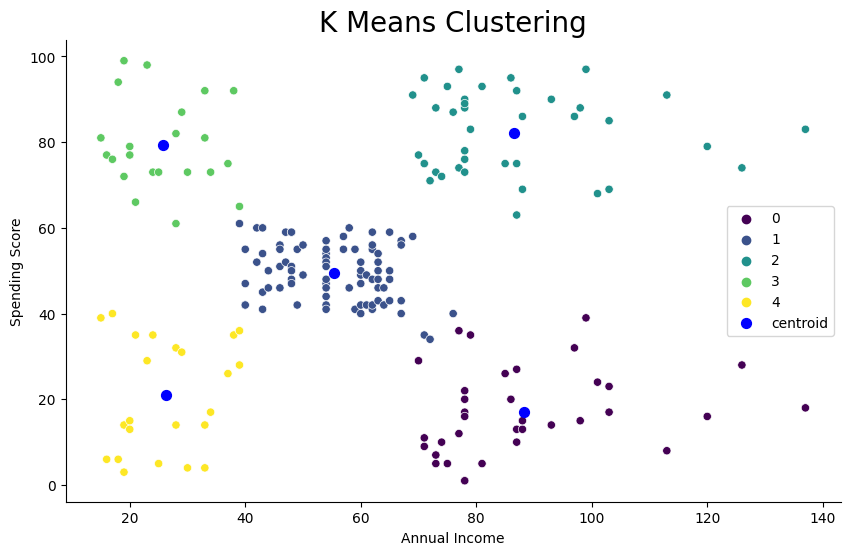

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"], palette='viridis', hue=df_clustered['Cluster'])

for loc in ['right', 'top']:
    ax.spines[loc].set_visible(False)
 

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

So we see that there are 5 groups of customer:

1. Low income with low spending score.
2. Low income with high spending score.
3. Average income with average spending score.
4. High income with low spending score.
5. High income with high spending score.

So of course our target group is the high income with high spending score. But we can now also think about how we get the high income with low spending score into the high spending group and conduct targeted marketing campaign. So who is in this group?

In [ ]:
df_high_income_low_spending = df_clustered[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].query('Cluster == 0')

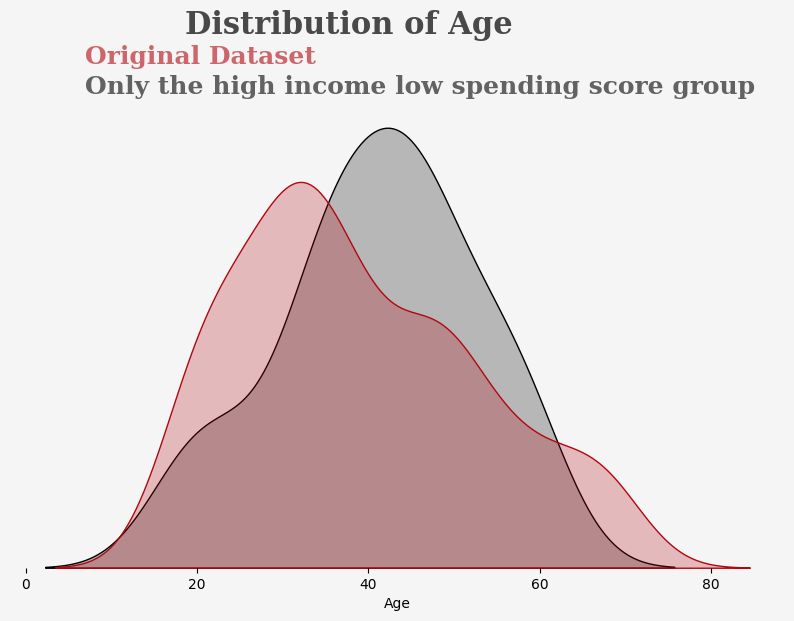

In [ ]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(df_high_income_low_spending["Age"],color="black",fill=True)
ax=sns.kdeplot(df["Age"],color="#b20710",fill=True)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Age", {'font': 'Serif','weight':'bold', 'size': '22','color':'black'}, alpha = 0.7)
fig.text(0.2,0.95,"Original Dataset",**{'font':'serif', 'size':18,'weight':'bold','color':'#b20710'}, alpha = 0.6)
fig.text(0.2,0.90,"Only the high income low spending score group",**{'font':'serif', 'size':18,'weight':'bold','color':'black'}, alpha = 0.6)

fig.show()

Let's look at the gender distribution in the high income, low spending cluster.

In [ ]:
x_gender = df_high_income_low_spending['Gender'].value_counts()
x_male_percentage = int(x_gender['Male']/len(df_high_income_low_spending) * 100)
x_female_percentage = int(x_gender['Female']/len(df_high_income_low_spending) * 100)
print(f'Male: {x_male_percentage}%\nFemale: {x_female_percentage}%' )

Male: 54%
Female: 45%


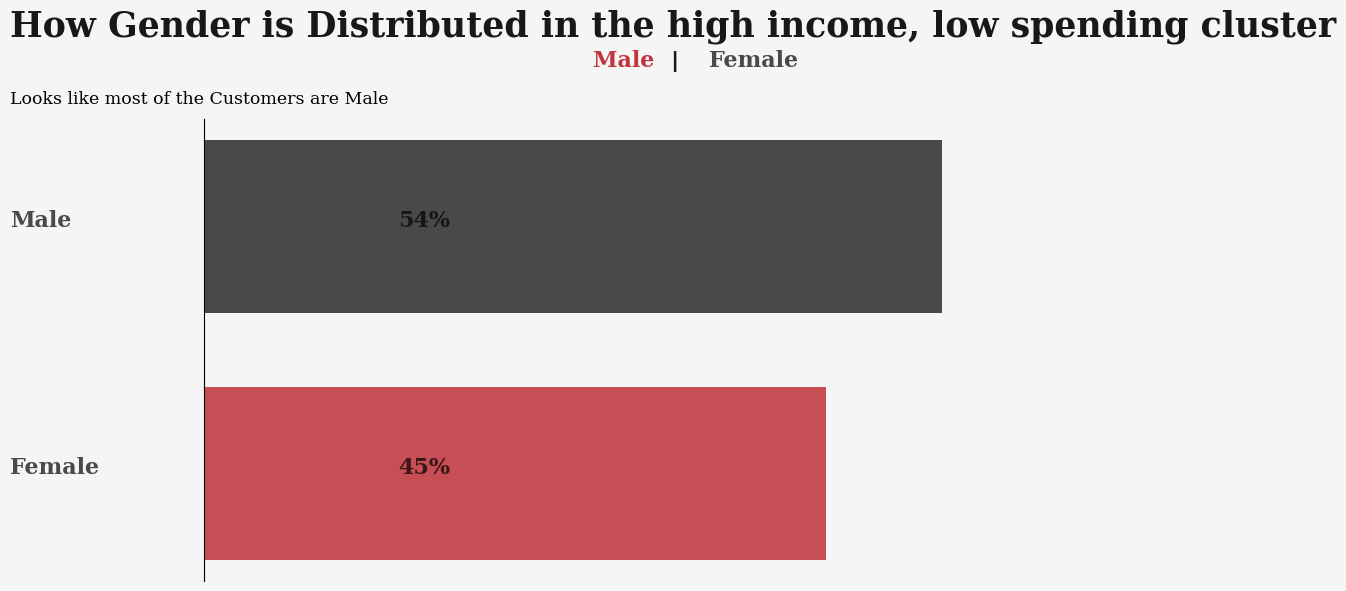

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.barh([1],x_gender.values[0],height=0.7,color='black',alpha=0.7)
plt.text(-5,1, 'Male', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(5,1, f'{x_male_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)



ax.barh([0],x_gender.values[1],height=0.7,color='#b20710',alpha=0.7)
plt.text(-5,0, 'Female', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(5,0, f'{x_female_percentage}%', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-5,1.77, 'How Gender is Distributed in the high income, low spending cluster' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(10,1.65, 'Male ', {'font': 'Serif','weight':'bold','size': '16', 'color':'#b20710'}, alpha = 0.8)
plt.text(12,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'}, alpha = 0.9)
plt.text(13,1.65, 'Female', {'font': 'Serif','weight':'bold', 'size': '16','color':'black'}, alpha = 0.7)
plt.text(-5,1.5, 'Looks like most of the Customers are Male', 
        {'font':'Serif', 'size':'12.5','color': 'black'})


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can see that this group is on average older compared to the whole data set and that there are proportionally more men in this group than the whole data set.

Exercise: What happens when we include the age and the gender into the clustering, do you still see clusters? If yes how are they composed? Feel free to visualize the results using different pairwise feature combinations or even using a 3D plot. 